<a href="https://www.kaggle.com/code/utkarshx27/diabetes-prediction-rf-model-96-acc?scriptVersionId=131113477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:#159364; font-family:verdana;"> <center>Predicting Diabetes with Medical & Demographic Data</center> </h1>

# DataSet Information:
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# 📚Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


# Data Overview

In [3]:
df= pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


# 🧮Summary statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,99982.0,0.585625,0.492616,0.00,0.00,1.00,1.00,1.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 6.9+ MB


# Detecting outliers

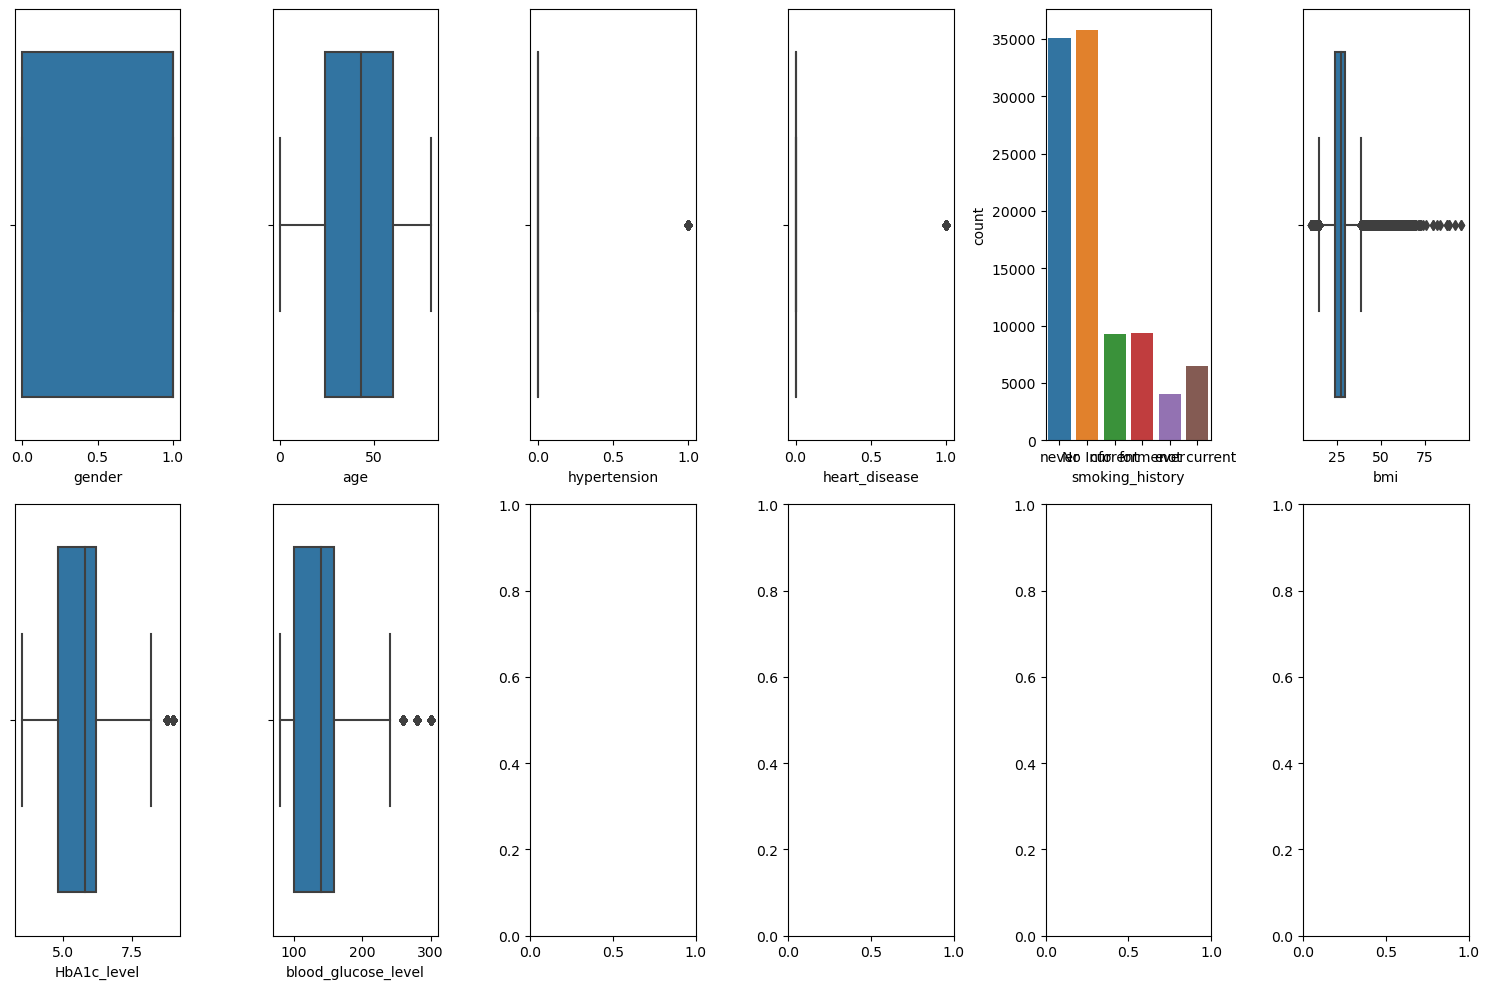

In [6]:
def boxplots(df):
    cols = df.columns[:-1]
    n = (len(cols) - 1) // 6 + 1
    m = min(len(cols), 6)
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        if df[col].dtype == 'object':
            sns.countplot(data=df, x=col, ax=axes[i][j])
        else:
            sns.boxplot(data=df, x=col, ax=axes[i][j])
    plt.tight_layout()
    plt.show()

boxplots(df)


# Fixing outliers

In [7]:
def outliers_removal(df, col):
    if df[col].dtype != 'object':
        perc = np.percentile(df[col], [0, 25, 50, 75, 100])
        iqr = perc[3] - perc[1]
        _min = perc[1] - 1.5*iqr
        _max = perc[3] + 1.5*iqr
        df.loc[df[col] > _max, col] = _max
        df.loc[df[col] < _min, col] = _min
    return df

for col in df.columns[:-1]:
    df = outliers_removal(df, col)


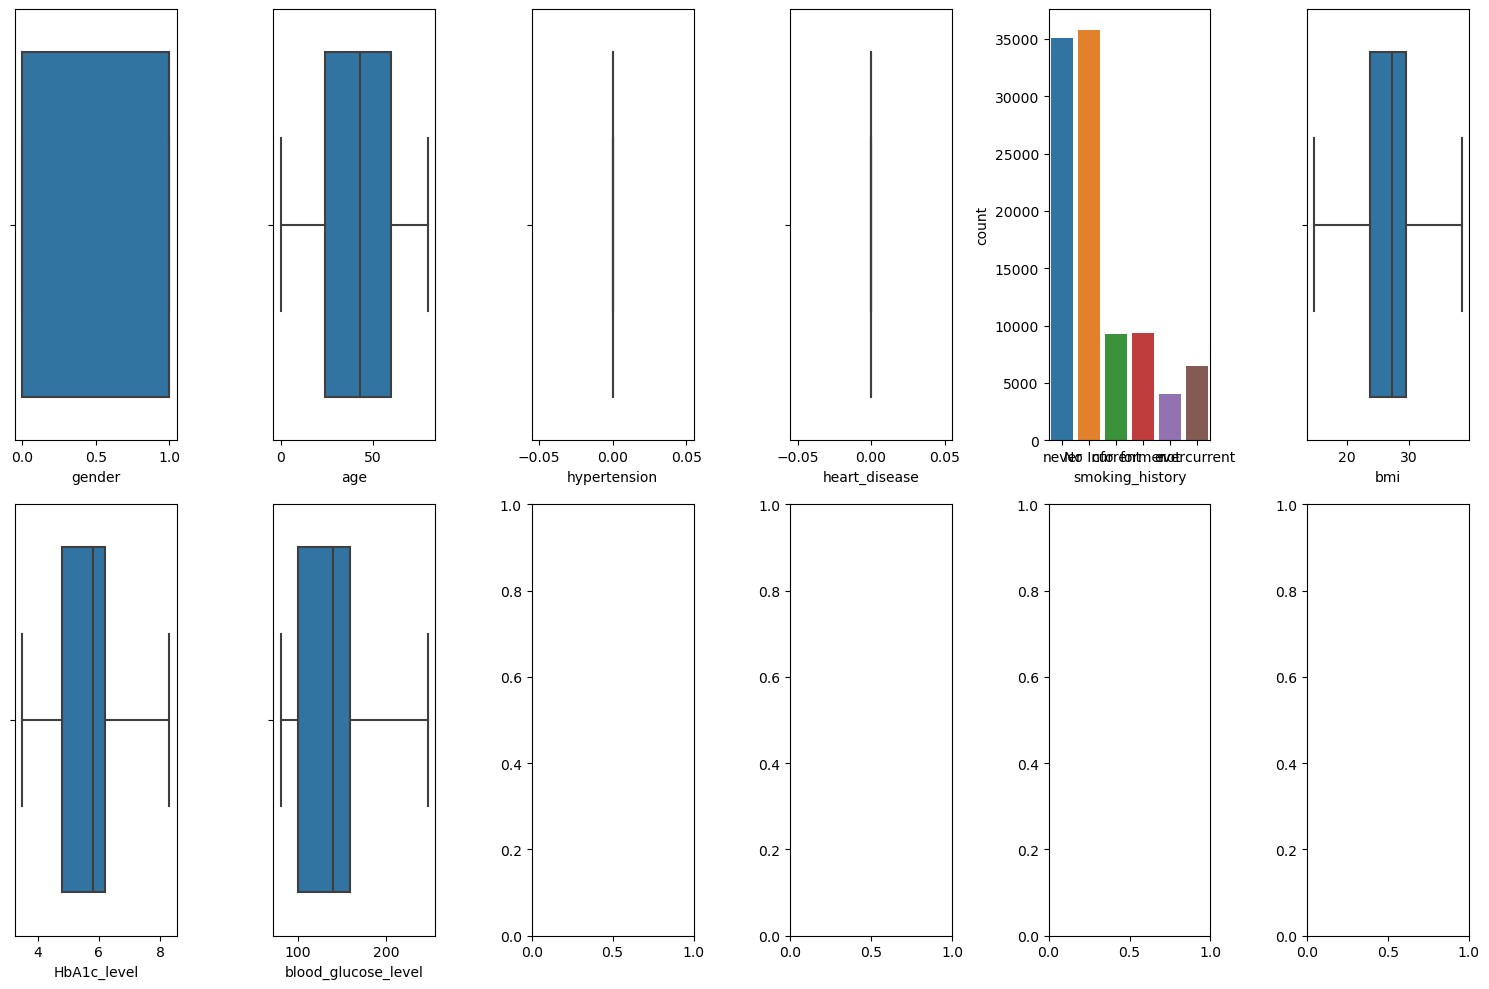

In [8]:
boxplots(df)

In [9]:
df = df.dropna(axis=True)

# 🌲Random Forest Model and Evaluating model(Accuracy, CM, ROC Curve, Precision-Recall curve, Cross-Validation Scores)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.96845
Confusion Matrix:
[[18182   110]
 [  521  1187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.92      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



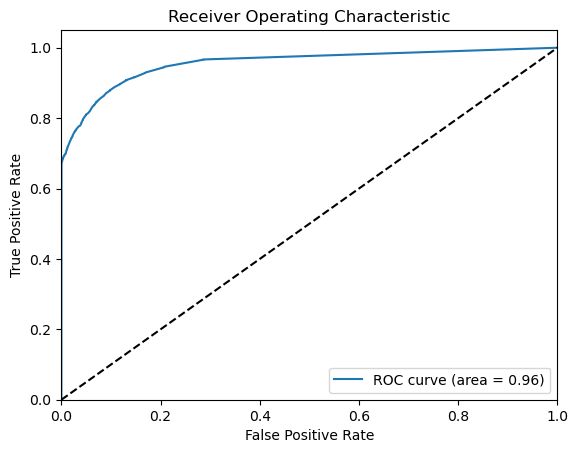

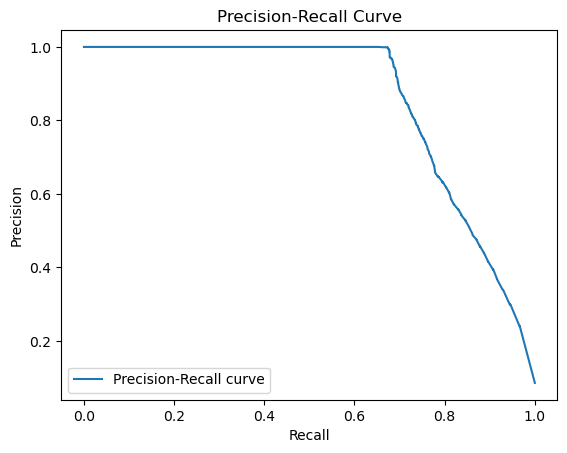

Cross-Validation Scores: [0.9698  0.96815 0.96575 0.9688  0.96795]
Average Cross-Validation Score: 0.9680899999999999


In [10]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['smoking_history']])

feature_names = encoder.get_feature_names_out(['smoking_history'])
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_final = pd.concat([X.drop('smoking_history', axis=1), X_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

cv_scores = cross_val_score(model, X_final, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))
